### Autoencoder

This is one of the unsupervised learning algorithm.

This can be used for 

1.Dimensionality Reduction
2.Image Compression
3.Image Denoising
4.Feature Extraction
5.Image generation
6.Sequence to sequence prediction
7.Recommendation system

Here we are building a system that can be used to reduce the noise from the image and to increase the quality of the image.

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()
print('Max value in the x_train is', x_train[0].max())
print('Min value in the x_train is', x_train[0].min())

Max value in the x_train is 255
Min value in the x_train is 0


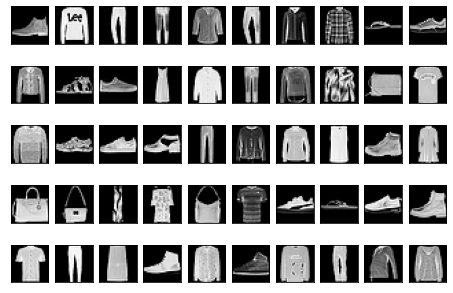

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 10) 
fig.tight_layout(pad=-1)
plt.gray()
a = 0 
for i in range(5): 
  for j in range(10): 
    axs[i, j].imshow(tf.squeeze(x_test[a])) 
    axs[i, j].xaxis.set_visible(False) 
    axs[i, j].yaxis.set_visible(False) 
    a = a + 1 

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [16]:
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [17]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

In [19]:
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

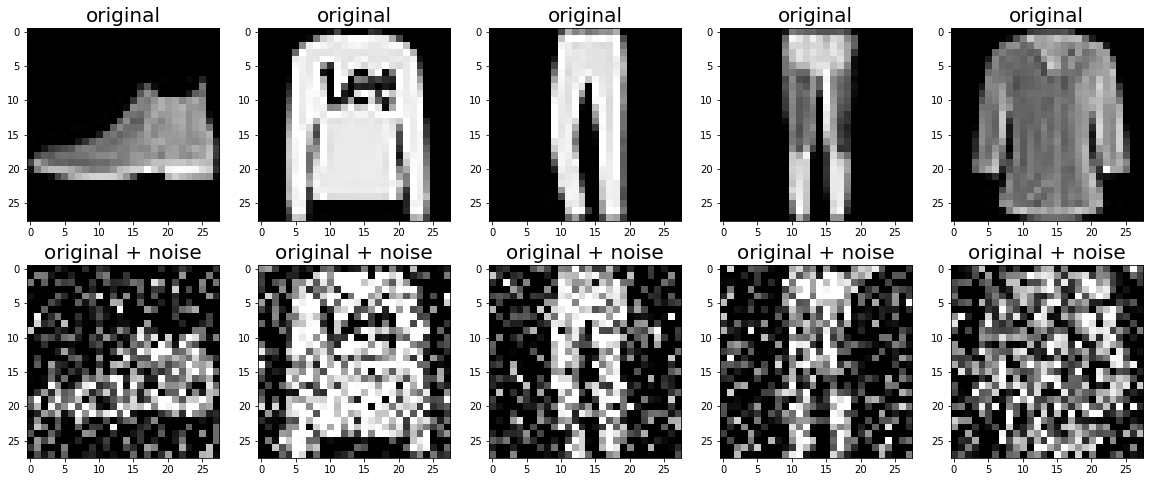

In [20]:
n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(x_test[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
plt.show()

In [21]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

class NoiseReducer(tf.keras.Model): 
  def __init__(self):
    super(NoiseReducer, self).__init__() 

    self.encoder = tf.keras.Sequential([ 
                          Input(shape=(28, 28, 1)), 
                          Conv2D(16, (3,3), activation='relu', padding='same', strides=2), 
                          Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
                                        ]) 
    
    self.decoder = tf.keras.Sequential([ 
                  Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
                  Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
                  Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
                                        ]) 
  
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [22]:
autoencoder = NoiseReducer()

In [23]:
autoencoder.compile(optimizer='adam', loss='mse')

In [24]:
autoencoder.fit(x_train_noisy, 
                x_train, 
                epochs=10, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0239 - val_loss: 0.0170
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0163 - val_loss: 0.0158
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0153 - val_loss: 0.0151
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 6/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0141 - val_loss: 0.0142
Epoch 9/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 10/10
1875/1875 [==============================] - 53s 28m

In [25]:
encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)

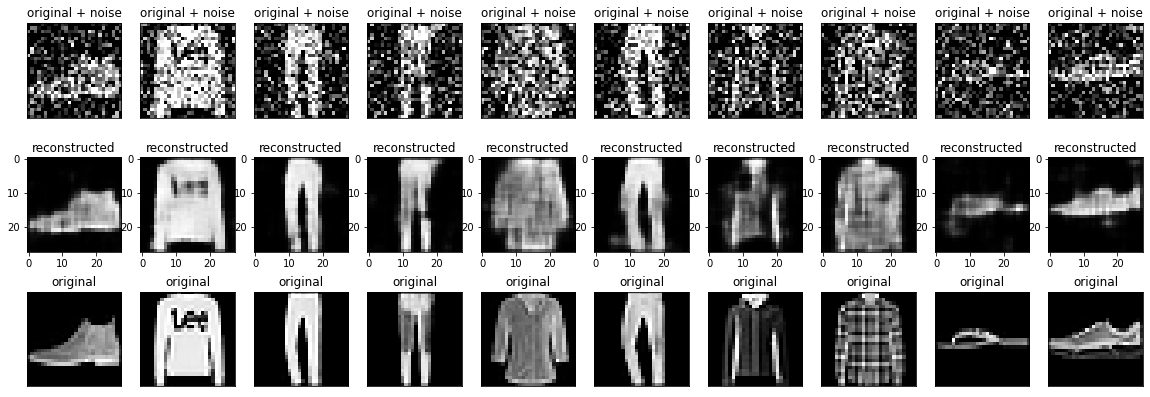

In [26]:
n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(x_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()